In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications import VGG19
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
data_dir = '../content/drive/MyDrive/chest_xray'

train_dir = data_dir + '/train'
val_dir = data_dir + '/val'
test_dir = data_dir + '/test'

In [ ]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True)

Found 5216 images belonging to 3 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

Found 24 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False)

Found 624 images belonging to 3 classes.


In [ ]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + (3,))

for layer in base_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = len(train_generator)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator))


Epoch 1/10
163/163 [==============================] - 1568s 10s/step - loss: 0.7719 - accuracy: 0.6794 - val_loss: 0.7632 - val_accuracy: 0.5417
Epoch 2/10
163/163 [==============================] - 171s 1s/step - loss: 0.5856 - accuracy: 0.7448 - val_loss: 0.8320 - val_accuracy: 0.5833
Epoch 3/10
163/163 [==============================] - 171s 1s/step - loss: 0.5615 - accuracy: 0.7521 - val_loss: 0.6901 - val_accuracy: 0.6250
Epoch 4/10
163/163 [==============================] - 171s 1s/step - loss: 0.5309 - accuracy: 0.7690 - val_loss: 0.7365 - val_accuracy: 0.6667
Epoch 5/10
163/163 [==============================] - 172s 1s/step - loss: 0.5222 - accuracy: 0.7743 - val_loss: 0.8301 - val_accuracy: 0.5833
Epoch 6/10
163/163 [==============================] - 171s 1s/step - loss: 0.5077 - accuracy: 0.7795 - val_loss: 0.8216 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 172s 1s/step - loss: 0.5075 - accuracy: 0.7724 - val_loss: 0.7275 - val_accuracy: 0.66

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

20/20 [==============================] - 180s 9s/step - loss: 0.5101 - accuracy: 0.8429
Test Accuracy: 0.8429487347602844


In [ ]:
# Predict the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

20/20 [==============================] - 15s 722ms/step


In [ ]:
confusion_mat = confusion_matrix(true_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[235   7   0]
 [ 15 179  40]
 [ 36   0 112]]


In [ ]:
# Classification Report
target_names = list(test_generator.class_indices.keys())
class_report = classification_report(true_classes, y_pred_classes, target_names=target_names)
print("Classification Report:")
print(class_report)


Classification Report:
                     precision    recall  f1-score   support

non_viral_pneumonia       0.82      0.97      0.89       242
             normal       0.96      0.76      0.85       234
    viral_pneumonia       0.74      0.76      0.75       148

           accuracy                           0.84       624
          macro avg       0.84      0.83      0.83       624
       weighted avg       0.85      0.84      0.84       624



In [ ]:
# Precision, Recall, and F1-score for the whole model
precision = precision_score(true_classes, y_pred_classes, average='weighted')
recall = recall_score(true_classes, y_pred_classes, average='weighted')
f1 = f1_score(true_classes, y_pred_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8543146375195482
Recall: 0.842948717948718
F1-score: 0.8419558913308913


In [ ]:
model.save('pneumonia_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('/content/drive/My Drive/vgg19_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


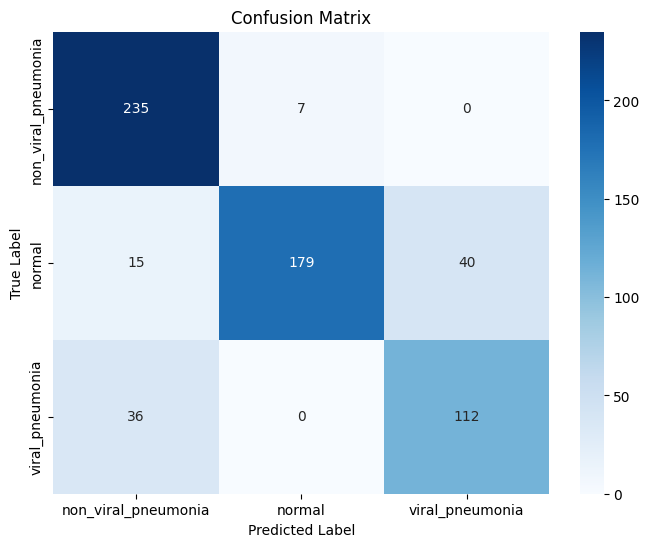

In [ ]:
import seaborn as sns
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# Display model architecture summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
!pip install pydot



In [ ]:
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
import pydot
import graphviz


In [ ]:
import json

# Convert model architecture to JSON string
model_json = model.to_json()

# Save JSON string to a file
with open('/content/drive/My Drive/vgg19_model_architecture.json', 'w') as json_file:
    json_file.write(model_json)



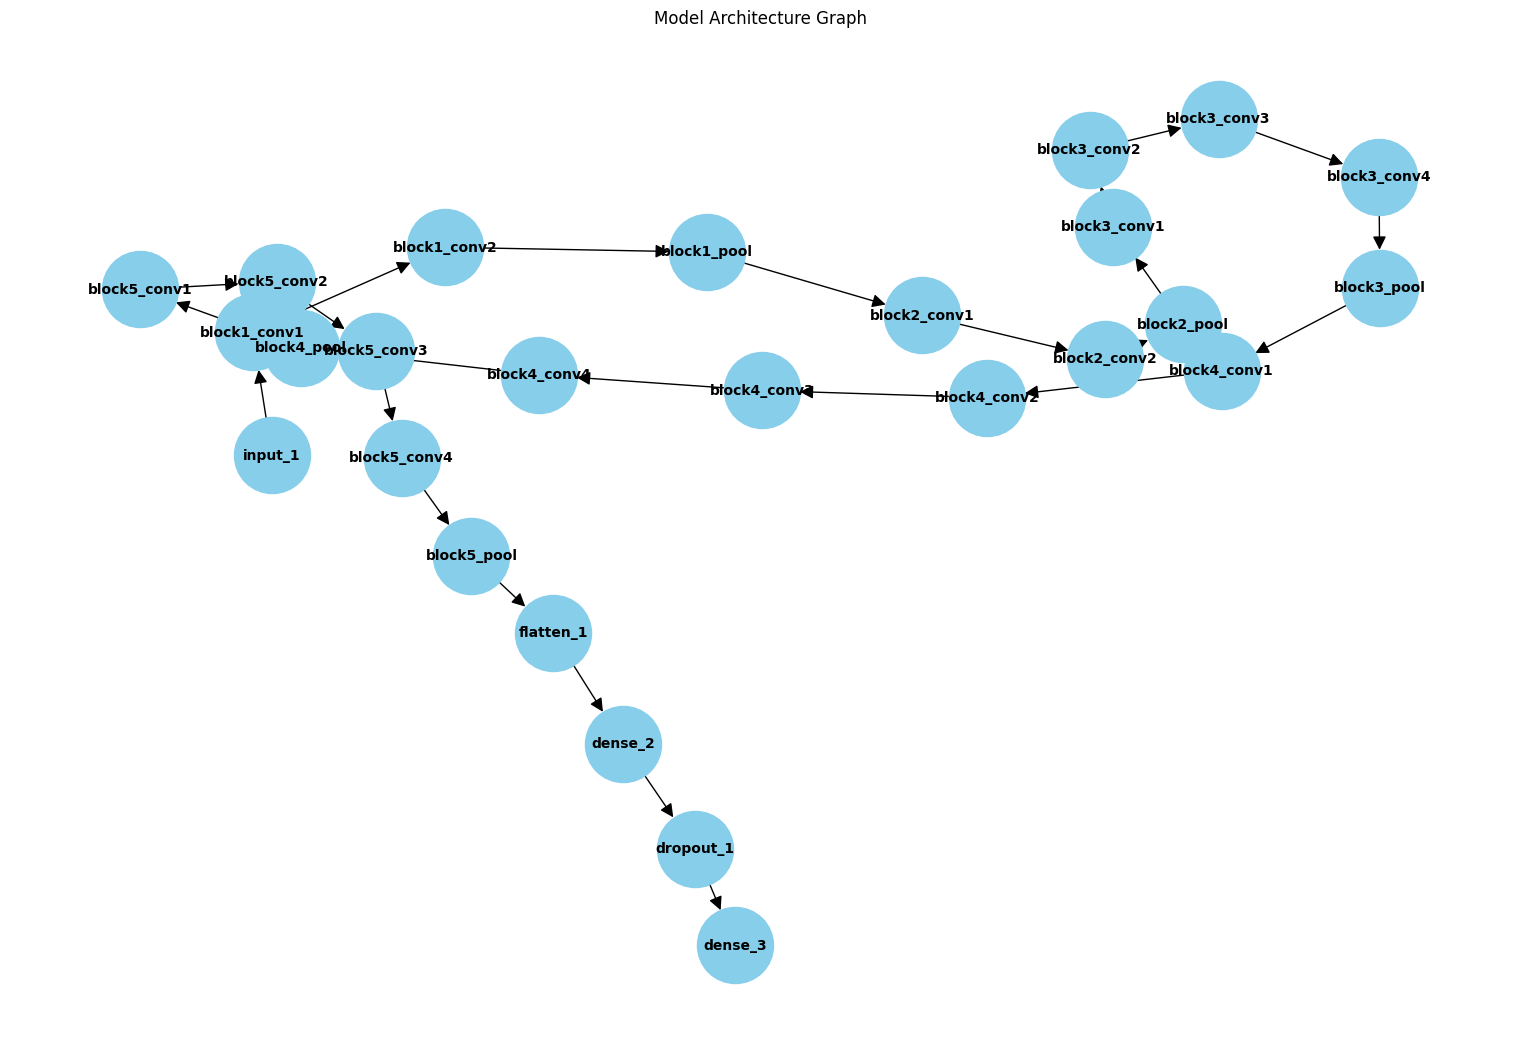

In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load the JSON file containing the model architecture
with open('/content/drive/My Drive/vgg19_model_architecture.json', 'r') as json_file:
    model_json = json_file.read()

# Parse the JSON data
model_data = json.loads(model_json)

# Create a directed graph
graph = nx.DiGraph()

# Add nodes (layers) to the graph
for layer in model_data['config']['layers']:
    graph.add_node(layer['name'])

# Add edges (connections between layers)
for layer in model_data['config']['layers']:
    if 'inbound_nodes' in layer and len(layer['inbound_nodes']) > 0:
        for inbound_node in layer['inbound_nodes'][0]:
            graph.add_edge(inbound_node[0], layer['name'])

# Visualize the graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', arrowsize=20)
plt.title('Model Architecture Graph')
plt.savefig('/content/drive/My Drive/vgg19_model_architecture.png')
plt.show()


In [ ]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.4 MB/s eta 0:00:00


In [ ]:
!pip install tf2onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import onnx
import numpy as np
import tensorflow as tf
from keras.models import load_model
import tf2onnx

# Load your Keras model
keras_model = load_model('/content/drive/My Drive/vgg19_model.h5')

# Convert the Keras model to a TensorFlow model
tf_model = tf.keras.models.clone_model(keras_model)
tf_model.set_weights(keras_model.get_weights())

# Convert the TensorFlow model to ONNX
onnx_model, _ = tf2onnx.convert.from_keras(tf_model)

# Save the ONNX model to a file

onnx.save_model(onnx_model, "/content/drive/MyDrive/model.onnx")

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# Load the trained model
model = load_model('/content/drive/My Drive/vgg19_model.h5')

# Function to preprocess input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match the input size of the model
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Path to the test image you want to predict
test_image_path = '/content/drive/My Drive/chest_xray/test/normal/IM-0003-0001.jpeg'

# Preprocess the test image
test_image = preprocess_image(test_image_path)

# Make prediction
predictions = model.predict(test_image)

# Interpret the predictions
class_labels = ['Non-viral Pneumonia', 'Normal', 'Viral Pneumonia']
predicted_class_index = np.argmax(predictions)
predicted_class = class_labels[predicted_class_index]
confidence = predictions[0][predicted_class_index]

print("Predicted class:", predicted_class)
print("Confidence:", confidence)


1/1 [==============================] - 2s 2s/step
Predicted class: Normal
Confidence: 0.9789565


In [ ]:
def predict_single_image(model, image_path):
    # Preprocess the image
    img_array = preprocess_image(image_path)

    # Make prediction
    predictions = model.predict(img_array)

    # Interpret the predictions
    class_labels = ['Non-viral Pneumonia', 'Normal', 'Viral Pneumonia']
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

In [ ]:
image_path = '/content/drive/My Drive/chest_xray/test/normal/IM-0005-0001.jpeg'
predicted_class, confidence = predict_single_image(model, image_path)
print("Predicted class:", predicted_class)
print("Confidence:", confidence)

1/1 [==============================] - 1s 685ms/step
Predicted class: Normal
Confidence: 0.9954028


In [ ]:
image_path = '/content/drive/My Drive/chest_xray/test/viral_pneumonia/person1_virus_9.jpeg'
predicted_class, confidence = predict_single_image(model, image_path)
print("Predicted class:", predicted_class)
print("Confidence:", confidence)

1/1 [==============================] - 1s 1s/step
Predicted class: Viral Pneumonia
Confidence: 0.867502


In [ ]:
image_path = '/content/drive/My Drive/chest_xray/test/non_viral_pneumonia/person174_bacteria_832.jpeg'
predicted_class, confidence = predict_single_image(model, image_path)
print("Predicted class:", predicted_class)
print("Confidence:", confidence)

1/1 [==============================] - 1s 1s/step
Predicted class: Non-viral Pneumonia
Confidence: 0.87359095


In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.4 MB/s et

In [ ]:
import gradio as gr
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
import os

# Load the model
model = load_model('/content/drive/My Drive/vgg19_model.h5')

# Function to preprocess input image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize the image to match the input size of the model
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to predict single image
def predict_single_image(img):
    img_path = '/content/' + img.name  # Save the uploaded file to the colab content directory
    img.save(img_path)
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    class_labels = ['Non-viral Pneumonia', 'Normal', 'Viral Pneumonia']
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index]
    os.remove(img_path)  # Remove the temporary image file
    return {'prediction': predicted_class, 'confidence': confidence}

# Create Gradio interface
gr.Interface(predict_single_image, "file", "json").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f03995636d97202daa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
